# Privatization of Space 

Exploration of the data available to see if we can answer questions of the overall trends. 

1. Are rockets launches increasing both quantity and success rate?
2. Has the private sector become more dominant now?
3. Are public or private space launches more successful?

To take a closer look at these questions the first thing is look at first few rows at how the data looks and to see if any cleaning is required from data acquired in https://www.kaggle.com/datasets/davidroberts13/one-small-step-for-data

In [1]:
# Load libraries and check if any cleaning is required?
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


space_df = pd.read_csv('Global Space Launches.csv')
space_df.head()

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Country of Launch,Companys Country of Origin,Private or State Run,DateTime,Year,Month,Day,Date,Time
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,P,2020-08-07 05:12:00+00:00,2020,8,7,07/08/2020,05:12
1,CASIC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,China,S,2020-08-06 04:01:00+00:00,2020,8,6,06/08/2020,04:01
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,P,2020-08-04 23:57:00+00:00,2020,8,4,04/08/2020,23:57
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,Russia,S,2020-07-30 21:25:00+00:00,2020,7,30,30/07/2020,21:25
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,P,2020-07-30 11:50:00+00:00,2020,7,30,30/07/2020,11:50


The first thing to clear up is any null values and see if we need to drop anything. Per the output below we find that only the rocket column has any null values as this is not used by me. I choose to ignore it for now.

In [12]:
# Check if any null values
space_df.isnull().sum()

Company Name                     0
Location                         0
Detail                           0
Status Rocket                    0
 Rocket                       3349
Status Mission                   0
Country of Launch                0
Companys Country of Origin       0
Private or State Run             0
DateTime                         0
Year                             0
Month                            0
Day                              0
Date                             0
Time                             0
decade                           0
success                          0
dtype: int64

As I want to look at figures over the decades instead of years I will add a new decade column to group these by decade using the year column to create said records.

In [3]:
# First add decades to divide analysis by those
space_df['decade'] = space_df['Year'].apply(lambda row : str(row)[:-1] + '0\'s')
space_df.head()

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Country of Launch,Companys Country of Origin,Private or State Run,DateTime,Year,Month,Day,Date,Time,decade
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,P,2020-08-07 05:12:00+00:00,2020,8,7,07/08/2020,05:12,2020's
1,CASIC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,China,S,2020-08-06 04:01:00+00:00,2020,8,6,06/08/2020,04:01,2020's
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,P,2020-08-04 23:57:00+00:00,2020,8,4,04/08/2020,23:57,2020's
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,Russia,S,2020-07-30 21:25:00+00:00,2020,7,30,30/07/2020,21:25,2020's
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,P,2020-07-30 11:50:00+00:00,2020,7,30,30/07/2020,11:50,2020's


As the 2020's decade has not been completed, and really is just getting started, I will remove the 2020's from the dataset.

In [4]:
# Also dropping data from 2020 since decade isn't complete and barely starting.
space_df = space_df[space_df.decade != '2020\'s']
space_df.head()

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Country of Launch,Companys Country of Origin,Private or State Run,DateTime,Year,Month,Day,Date,Time,decade
63,CASIC,"LC-101, Wenchang Satellite Launch Center, China",Long March 5 | Shijian-20,StatusActive,NaN,Success,China,China,S,2019-12-27 12:45:00+00:00,2019,12,27,27/12/2019,12:45,2010's
64,VKS RF,"Site 133/3, Plesetsk Cosmodrome, Russia","Rokot/Briz KM | Gonets-M ???24, 25, 26 [block-...",StatusRetired,41.8,Success,Russia,Russia,S,2019-12-26 23:11:00+00:00,2019,12,26,26/12/2019,23:11,2010's
65,Roscosmos,"Site 81/24, Baikonur Cosmodrome, Kazakhstan",Proton-M/DM-3 | Elektro-L n†­3,StatusActive,65.0,Success,Kazakhstan,Russia,S,2019-12-24 12:03:00+00:00,2019,12,24,24/12/2019,12:03,2010's
66,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V N22 | Starliner OFT,StatusActive,NaN,Success,USA,USA,P,2019-12-20 11:36:00+00:00,2019,12,20,20/12/2019,11:36,2010's
67,CASIC,"LC-9, Taiyuan Satellite Launch Center, China","Long March 4B | CBERS-4A, ETRSS-1 & Others",StatusActive,64.68,Success,China,China,S,2019-12-20 03:22:00+00:00,2019,12,20,20/12/2019,03:22,2010's


With this now I am confident I can begin plotting any observations and possibly comment on them.

## Are rockets launches increasing both quantity and success rate?

To answer this question we must first group the data by decade. Then we will count the total launches and get the percentage of successes to see if we notice any trends.

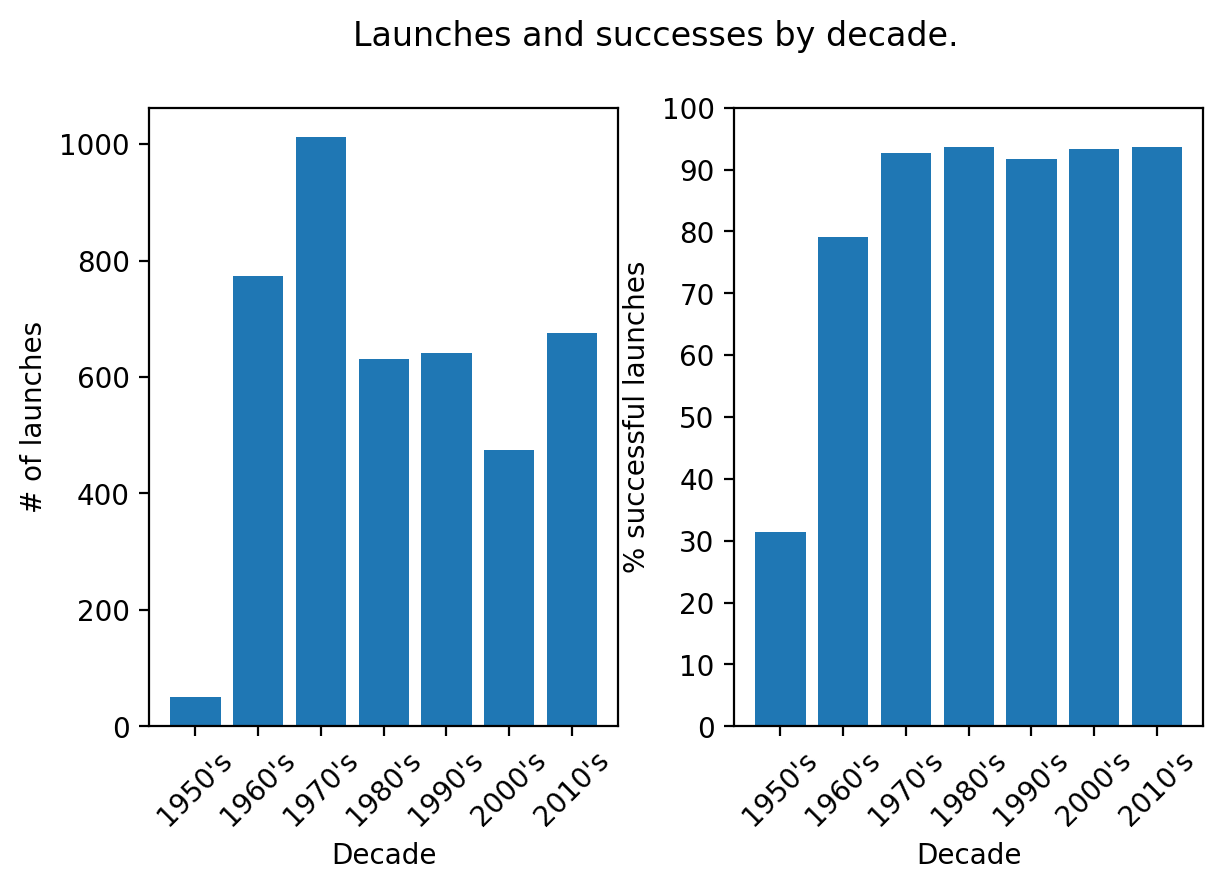

In [5]:
# space launches
space_launches = space_df.groupby('decade')['decade'].count()
fig, ax = plt.subplots(1,2)
fig.set_dpi(200)
fig.suptitle('Launches and successes by decade.')
fig.tight_layout()
ax[0].bar(space_launches.keys(), space_launches.values)
ax[0].set_ylabel('# of launches')
ax[0].set_xlabel('Decade')
ax[0].tick_params(axis='x', rotation=45)
# space successes percentages
space_df['success'] = (space_df['Status Mission'] == 'Success')
space_success = space_df.groupby('decade')['success'].mean() * 100
ax[1].bar(space_success.keys(), space_success.values)
ax[1].set_xlabel('Decade')
ax[1].set_ylabel('% of successful launches')
ax[1].set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax[1].tick_params(axis='x', rotation=45);

The first decade which started late in 1957 was low. However, after that the numbers shot up in the 1960's and 1970's before dropping and more or less stabalizing thereafter. What is laos interesting is the launch success rate which can be said to have been abysmal at the start. Before having major gains in the 1960's and 1970's again. After that the successes seem to be in the low 90's as percentages for the missions.

## Has the private sector become more dominant now?

There has always been question about work from the private sector and state run sector. To do a comparison we can check a comparison of the share of missions from each sector.

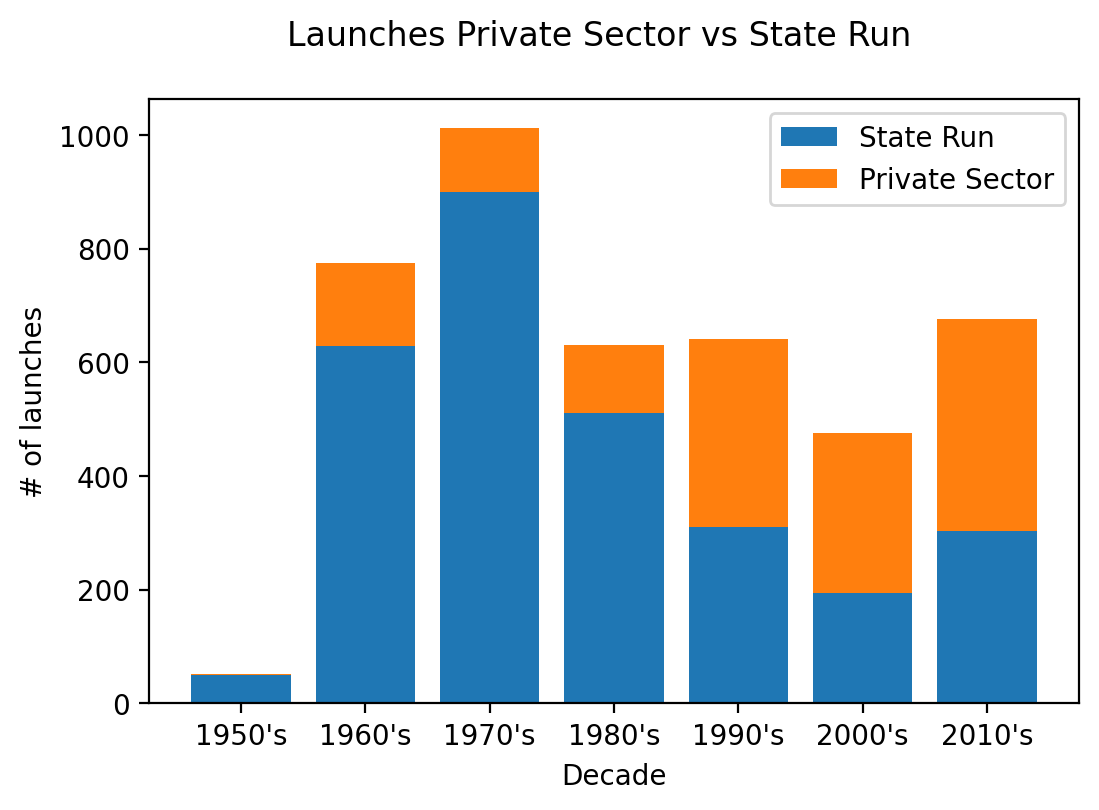

In [9]:
# Is private sector more dominant now?
space_private = space_df.groupby(['decade', 'Private or State Run'])['Company Name'].count()
decades = space_private.index.unique(0)
private = [space_private[x]['P'] for x in decades]
public = [space_private[x]['S'] for x in decades]
fig, ax = plt.subplots()
fig.suptitle('Space Launches Private Sector vs State Run')
fig.set_dpi(200)
ax.bar([x for x in decades], public, label='State Run')
ax.bar([x for x in decades], private, bottom=public, label='Private Sector')
ax.set_ylabel('# of launches')
ax.set_xlabel('Decade')
ax.legend();

Clearly the initial decades were dominated by the private sector, 1950's only had one private space mission. It isn't until the 1990's where we see the roles reverse and the private sector start to have a majority of the launches. The shares of their launches seemed to have increased in the 2000's and 2010's.

## Are public or private space launches more successful?

Now on to the more important question is there really any difference in the success rates between the two sectors?

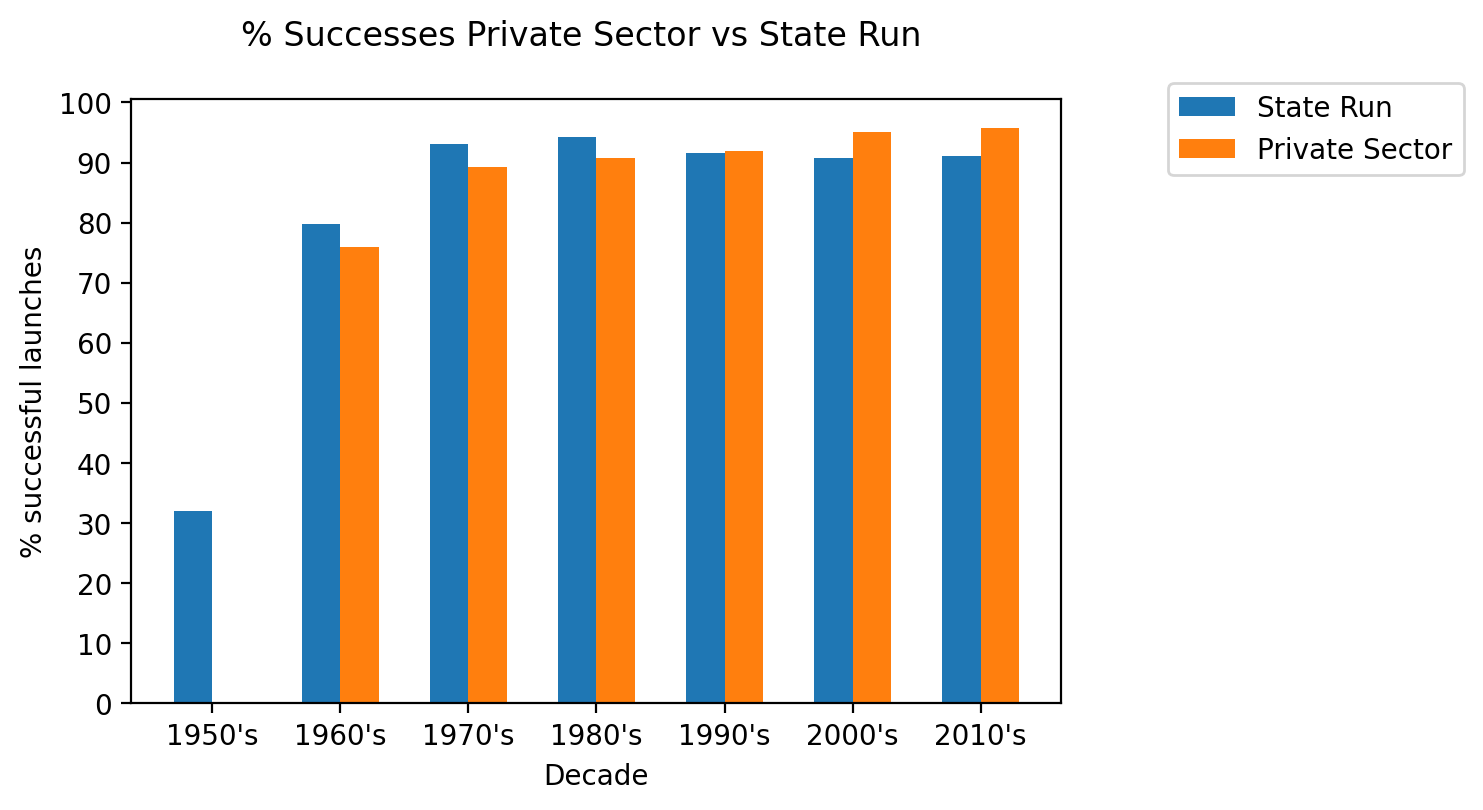

In [13]:
sector_success = space_df.groupby(['decade', 'Private or State Run'])['success'].mean() * 100
decades = sector_success.index.unique(0)
private = [sector_success[x]['P'] for x in decades]
public = [sector_success[x]['S'] for x in decades]
fig, ax = plt.subplots()
fig.set_dpi(200)
fig.suptitle('% Successes Private Sector vs State Run')
width = 0.3
indeces = np.arange(len(decades))
ax.bar(indeces, public, width, label='State Run')
ax.bar(indeces+width, private, width, label='Private Sector')
plt.xticks(indeces + width / 2, decades)
ax.set_ylabel('% successful launches')
ax.set_xlabel('Decade')
ax.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax.legend(bbox_to_anchor=(1.1, 1.05));

Per the chart there deosn't seem to be any major differences with from the 1960's onward. In reality 